# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

# Investigation of the reliability of borrowers

The customer is the bank's credit department. It is necessary to understand whether the marital status and the number of children of the client affects the fact of repayment of the loan on time. Input data from the bank — statistics on the solvency of customers.

The results of the study will be taken into account when building a model of **credit scoring** — a special system that evaluates the ability of a potential borrower to repay a loan to the bank.

## Шаг 1. Откройте файл с данными и изучите общую информацию
## Step 1. Open the data file and study the general information

In [56]:
import pandas as pd
from IPython.display import display
data = pd.read_csv('/datasets/data.csv')
display(data.head(10))
print('-----------------')
data.info()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод**

Данные содержат 12 столбцов.
Данные нуждаются в предобработке и удалении пропусков.

## Шаг 2. Предобработка данных
## Step 2. Data Preprocessing

### Обработка пропусков
### Processing of NaN

In [57]:
print('Информация по пропускам:')
print(data.isna().sum())
print('')
# Исследование пропусков на случайность
display(data[data['days_employed'].isna()])
print('')
print('Значения столбца children:')
print(data[data['days_employed'].isna()]['children'].value_counts())
print('')
print('Max/Min значения столбца dob_years:')
print('Max:', data[data['days_employed'].isna()]['dob_years'].max())
print('Min:', data[data['days_employed'].isna()]['dob_years'].min())
print('')
print('Значения столбца education:')
print(data[data['days_employed'].isna()]['education'].value_counts())
print('')
print('Значения столбца family_status:')
print(data[data['days_employed'].isna()]['family_status'].value_counts())
print('')
print('Значения столбца gender:')
print(data[data['days_employed'].isna()]['gender'].value_counts())
print('')
print('Значения столбца income_type:')
print(data[data['days_employed'].isna()]['income_type'].value_counts())
print('')
print('Значения столбца purpose:')
print(data[data['days_employed'].isna()]['purpose'].value_counts())
print('')
print('Количество несинхронизированных null/na значений:')
print((data['days_employed'].isna() != data['total_income'].isna()).sum())
print('-----------------')
#print('Проверка после замены пропусков:')
#data = data.fillna(0)
#print(data.isna().sum())
#print('-----------------')
#data.info()

Информация по пропускам:
children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64



,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости



Значения столбца children:
 0     1439
 1      475
 2      204
 3       36
 20       9
 4        7
-1        3
 5        1
Name: children, dtype: int64

Max/Min значения столбца dob_years:
Max: 73
Min: 0

Значения столбца education:
среднее                1408
высшее                  496
СРЕДНЕЕ                  67
Среднее                  65
неоконченное высшее      55
Высшее                   25
ВЫСШЕЕ                   23
начальное                19
НЕОКОНЧЕННОЕ ВЫСШЕЕ       7
Неоконченное высшее       7
НАЧАЛЬНОЕ                 1
Начальное                 1
Name: education, dtype: int64

Значения столбца family_status:
женат / замужем          1237
гражданский брак          442
Не женат / не замужем     288
в разводе                 112
вдовец / вдова             95
Name: family_status, dtype: int64

Значения столбца gender:
F    1484
M     690
Name: gender, dtype: int64

Значения столбца income_type:
сотрудник          1105
компаньон           508
пенсионер           413
госслуж

In [58]:
# Приведение всех текстовых записей к нижнему регистру
data['education'] = data['education'].str.lower()
data['family_status'] = data['family_status'].str.lower()
data['gender'] = data['gender'].str.lower()
data['income_type'] = data['income_type'].str.lower()

Люди с аномально высоким трудовым стажем: 
пенсионер      3443
безработный       2
Name: income_type, dtype: int64
Трудовой стаж для пенсионеров: Series([], Name: days_employed, dtype: int64)
Трудовой стаж для безработных: Series([], Name: days_employed, dtype: int64)
Трудовой стаж для пенсионеров после исправления: 0.0    3856
Name: days_employed, dtype: int64
Трудовой стаж для безработных после исправления: 0.0    2
Name: days_employed, dtype: int64
-----------------


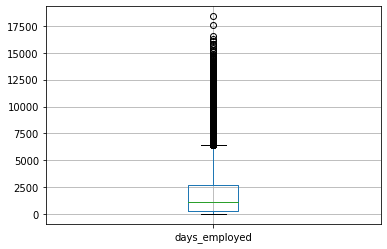

In [59]:
data['days_employed'] = data['days_employed'].abs() # убираю отриц значения
print('Люди с аномально высоким трудовым стажем: ')
print(data.loc[data.loc[:, 'days_employed'] > 60*365]['income_type'].value_counts())
days_employed_pensioners = data.loc[(data.loc[:, 'days_employed'] < 60*365) &
                                           (data.loc[:, 'income_type'] == 'пенсионер')]['days_employed'].value_counts()
print('Трудовой стаж для пенсионеров:', days_employed_pensioners)
days_employed_freeman = data.loc[(data.loc[:, 'days_employed'] < 60*365) &
                                           (data.loc[:, 'income_type'] == 'безработный')]['days_employed'].value_counts()
print('Трудовой стаж для безработных:', days_employed_freeman)
# ----------------------------------------------------
# Подфункция: проверка по возрасту и кол-ву рабочего стажа
def check_employed_time(row):
    days_employed = row['days_employed']
    income_type = row['income_type']
    # ----------------------
    if (income_type == 'пенсионер') | (income_type == 'безработный'):
        return 0
    else:
        return days_employed
# ----------------------------------------------------
data['days_employed'] = data.apply(check_employed_time, axis = 1)
days_employed_pensioners_after_corr = data.loc[data.loc[:, 'income_type'] == 'пенсионер']['days_employed'].value_counts()
print('Трудовой стаж для пенсионеров после исправления:', days_employed_pensioners_after_corr)
days_employed_freeman_after_corr = data.loc[data.loc[:, 'income_type'] == 'безработный']['days_employed'].value_counts()
print('Трудовой стаж для безработных после исправления:', days_employed_freeman_after_corr)
print('-----------------')
data.boxplot(column = 'days_employed')

Значения total_income:
Максимальное значение total_income: 2265604.028722744
Минимальное значение total_income: 20667.26379327158


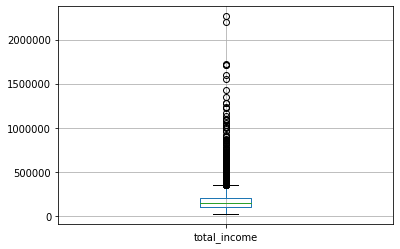

In [60]:
print('Значения total_income:')
print('Максимальное значение total_income:', data['total_income'].max())
print('Минимальное значение total_income:', data['total_income'].min())
data.boxplot(column = 'total_income')

In [61]:
print('Значения income_type:')
print(data['income_type'].value_counts())

Значения income_type:
сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64


In [62]:
median_stuff_days_employed = data.loc[data.loc[:, 'income_type'] == 'сотрудник']['days_employed'].median()
median_stuff_total_income  = data.loc[data.loc[:, 'income_type'] == 'сотрудник']['total_income'].median()
print('median_stuff_days_employed =', median_stuff_days_employed)
print('median_stuff_total_income =', median_stuff_total_income)
# ----------------------------------------------------
median_gvrmnt_days_employed = data.loc[data.loc[:, 'income_type'] == 'госслужащий']['days_employed'].median()
median_gvrmnt_total_income  = data.loc[data.loc[:, 'income_type'] == 'госслужащий']['total_income'].median()
print('median_gvrmnt_days_employed =', median_gvrmnt_days_employed)
print('median_gvrmnt_total_income =', median_gvrmnt_total_income)
# ----------------------------------------------------
median_partner_days_employed = data.loc[data.loc[:, 'income_type'] == 'компаньон']['days_employed'].median()
median_partner_total_income  = data.loc[data.loc[:, 'income_type'] == 'компаньон']['total_income'].median()
print('median_partner_days_employed =', median_partner_days_employed)
print('median_partner_total_income =', median_partner_total_income)
# ----------------------------------------------------
median_entrep_days_employed = data.loc[data.loc[:, 'income_type'] == 'предприниматель']['days_employed'].median()
median_entrep_total_income  = data.loc[data.loc[:, 'income_type'] == 'предприниматель']['total_income'].median()
print('median_entrep_days_employed =', median_entrep_days_employed)
print('median_entrep_total_income =', median_entrep_total_income)
# ----------------------------------------------------
median_pension_total_income  = data.loc[data.loc[:, 'income_type'] == 'пенсионер']['total_income'].median()
print('median_pension_total_income =', median_pension_total_income)
print('')
# ----------------------------------------------------
# Подфункция: заполнение пропусков 'days_employed'
def fill_null_values_days_employed(row):
    days_employed = row['days_employed']
    income_type   = row['income_type']
    if row.isna().any():
        if income_type == 'сотрудник':
            return median_stuff_days_employed
        if income_type == 'госслужащий':
            return median_gvrmnt_days_employed
        if income_type == 'компаньон':
            return median_partner_days_employed
        if income_type == 'предприниматель':
            return median_entrep_days_employed
        if income_type == 'пенсионер':
            return 0
    else:
        return days_employed
# ----------------------------------------------------
# Подфункция: заполнение пропусков 'total_income'
def fill_null_values_total_income(row):
    total_income  = row['total_income']
    income_type   = row['income_type']
    if row.isna().any():
        if income_type == 'сотрудник':
            return median_stuff_total_income
        if income_type == 'госслужащий':
            return median_gvrmnt_total_income
        if income_type == 'компаньон':
            return median_partner_total_income
        if income_type == 'предприниматель':
            return median_entrep_total_income
        if income_type == 'пенсионер':
            return median_pension_total_income
    else:
        return total_income
# ----------------------------------------------------
data['days_employed'] = data.apply(fill_null_values_days_employed, axis = 1)
data['total_income'] = data.apply(fill_null_values_total_income, axis = 1)
print('Проверка после замены пропусков:')
print(data.isna().sum())
print('-----------------')
data.info()

median_stuff_days_employed = 1574.2028211070851
median_stuff_total_income = 142594.39684740017
median_gvrmnt_days_employed = 2689.3683533043886
median_gvrmnt_total_income = 150447.9352830068
median_partner_days_employed = 1547.3822226779334
median_partner_total_income = 172357.95096577113
median_entrep_days_employed = 520.8480834953765
median_entrep_total_income = 499163.1449470857
median_pension_total_income = 118514.48641164352

Проверка после замены пропусков:
children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
edu

**Вывод**


**Conclusion**

Пропущенные значения обнаружены в столбцах 'days_employed' и 'total_income' и идут синхронно. Пропущенные значения заменены медианными по фильру столбца 'income_type'.

The missing values are found in the columns 'days_employed' and 'total_income' and go synchronously. The missing values are replaced by the median values according to the filter of the 'income_type' column.

### Замена типа данных

### Replacing the data type

In [63]:
data['days_employed'] = data['days_employed'].astype('int')
data['total_income'] = data['total_income'].astype('int')
display(data.head(10))
print('-----------------')
data.info()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,f,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,f,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,m,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,m,сотрудник,0,267628,дополнительное образование
4,0,0,53,среднее,1,гражданский брак,1,f,пенсионер,0,158616,сыграть свадьбу
5,0,926,27,высшее,0,гражданский брак,1,m,компаньон,0,255763,покупка жилья
6,0,2879,43,высшее,0,женат / замужем,0,f,компаньон,0,240525,операции с жильем
7,0,152,50,среднее,1,женат / замужем,0,m,сотрудник,0,135823,образование
8,2,6929,35,высшее,0,гражданский брак,1,f,сотрудник,0,95856,на проведение свадьбы
9,0,2188,41,среднее,1,женат / замужем,0,m,сотрудник,0,144425,покупка жилья для семьи


-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


**Вывод**

**Conclusion**

Выполнена замена типа данных с вещественного float64 на целочисленный int64 для столбцов 'days_employed' и 'total_income'

The data type was replaced from the real float64 to the integer int64 for the columns 'days_employed' and 'total_income'

### Обработка дубликатов

### Handling duplicates

In [64]:
# ====================================================
# Исправление значений столбца 'children'
print('Столбец children до исправления:')
print(data['children'].value_counts())
data['children'] = data['children'].replace(20, 2)
data['children'] = data['children'].replace(-1, 1)
print(' ')
print('Столбец children после исправления:')
print(data['children'].value_counts())
# ====================================================
# Исправление значений столбца 'dob_years' (ненулевые/отрицательные значения)
data['dob_years'] = data['dob_years'].abs()
data['days_employed'] = data['days_employed'].abs() # убираю отриц значения, т.к. будет использ для определения возраста
print('-----------------')
print('Максимальное значение dob_years до исправления:', data['dob_years'].max())
print('Минимальное значение dob_years до исправления:',  data['dob_years'].min())
median_of_age = data.loc[(data.loc[:, 'income_type'] != 'пенсионер') &
                         (data.loc[:, 'dob_years'] != 0)]['dob_years'].median()
print('Медиана не пенсионного возраста:', median_of_age)
median_of_pension_age = data.loc[(data.loc[:, 'income_type'] == 'пенсионер') &
                                 (data.loc[:, 'dob_years'] != 0)]['dob_years'].median()
print('Медиана пенсионного возраста:', median_of_pension_age)
print('Люди с нулевым возрастом: ')
print(data.loc[data.loc[:, 'dob_years'] == 0]['income_type'].value_counts())
# ----------------------------------------------------
# Подфункция: определение возраста
def check_age(row):
    dob_years = row['dob_years']
    income_type = row['income_type']
    years_employed = row['days_employed']/365
    if (dob_years == 0) & (income_type == 'пенсионер'):
        return int(median_of_pension_age)
    elif (dob_years == 0) & (income_type != 'пенсионер') & (years_employed <= 60):
        return int(years_employed+18)
    elif (dob_years == 0) & (income_type != 'пенсионер'):
        return int(median_of_age)
    else:
        return int(dob_years)
# ----------------------------------------------------
data['dob_years'] = data.apply(check_age, axis = 1)
print('Максимальное значение dob_years после исправления:', data['dob_years'].max())
print('Минимальное значение dob_years после исправления:',  data['dob_years'].min())
print('-----------------')
# ====================================================
# Исправление значений столбца 'education'
print('Значения education:')
print(data['education'].value_counts())
print('-----------------')
# ====================================================
# Исправление значений столбца 'education_id'
print('Значения education_id:')
print(data['education_id'].value_counts())
print('')
print('Проверка, что education соответствует education_id:')
print(data.loc[data.loc[:, 'education_id'] == 0]['education'].value_counts())
print(data.loc[data.loc[:, 'education_id'] == 1]['education'].value_counts())
print(data.loc[data.loc[:, 'education_id'] == 2]['education'].value_counts())
print(data.loc[data.loc[:, 'education_id'] == 3]['education'].value_counts())
print(data.loc[data.loc[:, 'education_id'] == 4]['education'].value_counts())
print('-----------------')
# ====================================================
# Исправление значений столбца 'family_status'
print('Значения family_status:')
print(data['family_status'].value_counts())
print('-----------------')
# ====================================================
# Исправление значений столбца 'family_status_id'
print('Значения family_status_id:')
print(data['family_status_id'].value_counts())
print('')
print('Проверка, что family_status соответствует family_status_id:')
print(data.loc[data.loc[:, 'family_status_id'] == 0]['family_status'].value_counts())
print(data.loc[data.loc[:, 'family_status_id'] == 1]['family_status'].value_counts())
print(data.loc[data.loc[:, 'family_status_id'] == 2]['family_status'].value_counts())
print(data.loc[data.loc[:, 'family_status_id'] == 3]['family_status'].value_counts())
print(data.loc[data.loc[:, 'family_status_id'] == 4]['family_status'].value_counts())
print('-----------------')
# ====================================================
# Исправление значений столбца 'gender'
print('Значения gender:')
print(data['gender'].value_counts())
# Поиск индекса значения xna
gender_idx = data.loc[data.loc[:, 'gender'] == 'xna'].index
#print(data.loc[data.loc[:, 'gender'] == 'xna'])
data = data.drop(index = gender_idx).reset_index(drop = True)
print('Значения gender после удаления строки:')
print(data['gender'].value_counts())
# ====================================================
# Исправление значений столбца 'debt'
print('Значения debt:')
print(data['debt'].value_counts())
# ====================================================
# Исправление значений столбца 'purpose'
print('Значения purpose:')
print(data['purpose'].value_counts())
print('')
print('Дубликатов найдено:')
print(data.duplicated().sum())
data = data.drop_duplicates().reset_index(drop = True)
print('Замена выполнена:')
print(data.duplicated().sum())

Столбец children до исправления:
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64
 
Столбец children после исправления:
0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64
-----------------
Максимальное значение dob_years до исправления: 75
Минимальное значение dob_years до исправления: 0
Медиана не пенсионного возраста: 39.0
Медиана пенсионного возраста: 60.0
Люди с нулевым возрастом: 
сотрудник      55
компаньон      20
пенсионер      20
госслужащий     6
Name: income_type, dtype: int64
Максимальное значение dob_years после исправления: 75
Минимальное значение dob_years после исправления: 18
-----------------
Значения education:
среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64
-----------------
Значения education_id:
1    15233
0     5

**Вывод**

**Conclusion**

Выполнено приведение всех текстовых записей к нижнему регистру.
Исправлены значения столбца 'children':
 - отрицательное количество детей невозможно
 - 20 детей - явная опечатка, т.к. обращений с таким количеством детей много больше, чем обращений с 5 детьми.
Столбец 'dob_years': выявлены нулевые значения в столбце и заменены:
 - если человек - пенсионер, то его возраст заменяется медианным по пенсионерам
 - если человек - не пенсионер, то его трудовой стаж + 18 лет
Столбец 'days_employed':
 - обнаружены аномально высокие значения и они все относятся к 'пенсионер' и 'безработный'.
   Их стаж заменён на 0, как у остальных 'пенсионеров' и 'безработных' в массиве
Столбцы 'education' и 'education_id': проверена синхронизация текстовых и числовых значений - все ок
Столбцы 'family_status' и 'family_status_id': проверена синхронизация текстовых и числовых значений - все ок
Столбец 'gender' - выявлена одна запись со значением 'xna'. Такого пола ещё не существует, строка с этой записью была удалена
Столбец 'income_type' - аномальных значений не обнаружено
Столбец 'debt' - аномальных значений не обнаружено
Столбец 'total_income' - аномальных значений не обнаружено
Столбец 'purpose' - аномальных значений не обнаружено
Выполнен поиск и удаление строк-дубликатов
Причины появления дубликатов, возможно, в многократном заполнении заявок на кредит одними и теми же людьми

All text entries have been reduced to lowercase.
Fixed the values of the 'children' column:
 - a negative number of children is impossible
 - 20 children is an obvious typo, because there are many more appeals with this number of children than there are appeals with 5 children.
Column 'dob_years': zero values were detected in the column and replaced:
 - if a person is a pensioner, then his age is replaced by the median for pensioners
 - if a person is not a pensioner, then his work experience is + 18 years
The 'days_employed'column:
 - abnormally high values were detected and they all relate to 'retired' and 'unemployed'.
   Their length of service is replaced by 0, like the rest of the 'pensioners' and 'unemployed' in the array
Columns 'education' and 'education_id': synchronization of text and numeric values is checked - everything is ok
Columns 'family_status' and 'family_status_id': synchronization of text and numeric values is checked - everything is ok
Column 'gender' - one record with the value 'xna'was detected. This gender does not exist yet, the line with this entry has been deleted
Column 'income_type' - no abnormal values found
The 'debt' column - no abnormal values were found
Column 'total_income' - no abnormal values were detected
The 'purpose' column - no abnormal values were detected
The search and removal of duplicate rows is performed
The reasons for the appearance of duplicates may be in the repeated filling out of loan applications by the same people

### Лемматизация

### Lemmatization

In [65]:
# Импорт бибилиотеки
from pymystem3 import Mystem
m = Mystem()
# ----------------------------------------------------
# Подфункция по лемматизации
def check_lemmas(row):
    text = row['purpose']
    lemmas = ' '.join(m.lemmatize(text))
    # ----------------------------------------------------
    if 'свадьба' in lemmas:
        return 'свадьба'
    # ----------------------------------------------------
    if 'образование' in lemmas:
        return 'образование'
    # ----------------------------------------------------
    if 'автомобиль' in lemmas:
        return 'автомобиль'
    # ----------------------------------------------------
    if ('недвижимость' in lemmas) | ('жилье' in lemmas):
        if ('коммерческая' in lemmas) | ('сдача' in lemmas):
            return 'недвижимость коммерция'
        else:
            return 'недвижимость своя'
    return(lemmas)
# ----------------------------------------------------
data['purpose_lemmarized'] = data.apply(check_lemmas, axis = 1)
print('Значения purpose_lemmarized:')
print(data['purpose_lemmarized'].value_counts())

Значения purpose_lemmarized:
недвижимость своя         10159
автомобиль                 4306
образование                4013
свадьба                    2324
недвижимость коммерция      651
Name: purpose_lemmarized, dtype: int64


**Вывод**

**Conclusion**

После лемматизации было выполнено исследование всех имеющихся записей в столбце 'purpose'.
Было выявлено 5 основных целей кредита: автомобиль, свадьба, образование, недвижимость своя, недвижимость коммерция.
Добавлен столбец 'purpose_lemmarized'. Цели: автомобиль, свадьба, образование - связаны с личным потреблением услуги.
Цели, связанные с недвижимостью разделены на свою и коммерческую, т.к. имеют разное предназначение.

After lemmatization, all available records in the 'purpose' column were examined.
5 main purposes of the loan were identified: car, wedding, education, own real estate, real estate commerce.
Added the 'purpose_lemmatized' column. Goals: car, wedding, education-are related to personal consumption of the service.
The goals related to real estate are divided into their own and commercial, because they have different purposes.

# Категоризация данных

# Data categorization

In [66]:
# ================================================
# Создание словаря education - > education_id
dict_income_type = data[['education', 'education_id']]
dict_income_type = dict_income_type.drop_duplicates().reset_index(drop = True)
print(dict_income_type.head())
print('-----------------------------------------')
# ================================================
# Создание словаря family_status - > family_status_id
dict_family_status = data[['family_status', 'family_status_id']]
dict_family_status = dict_family_status.drop_duplicates().reset_index(drop = True)
print(dict_family_status.head())
print('-----------------------------------------')
# ================================================
# Создание словаря income_type - > income_type_id
# ------------------------------------------------
def dict_creation_income_type(row):
    income_type = row['income_type']
    # --------------------------------------------
    if income_type == 'сотрудник':
        return 0
    # --------------------------------------------
    if income_type == 'компаньон':
        return 1
    # --------------------------------------------
    if income_type == 'пенсионер':
        return 2
    # --------------------------------------------
    if income_type == 'госслужащий':
        return 3
    # --------------------------------------------
    if income_type == 'безработный':
        return 4
    # --------------------------------------------
    if income_type == 'предприниматель':
        return 5
    # --------------------------------------------
    if income_type == 'студент':
        return 6
    # --------------------------------------------
    if income_type == 'в декрете':
        return 7
# ------------------------------------------------
inc_types_unique_names = data['income_type'].unique()
def dict_creation_income_type_2(row):
    income_type = row['income_type']
    # --------------------------------------------
    return list(inc_types_unique_names).index(income_type)
# ------------------------------------------------
#data['income_type_id'] = data.apply(dict_creation_income_type, axis = 1)
data['income_type_id'] = data.apply(dict_creation_income_type_2, axis = 1)
dict_income_type = data[['income_type', 'income_type_id']]
dict_income_type = dict_income_type.drop_duplicates().reset_index(drop = True)
print(dict_income_type.head(10))
print('-----------------------------------------')
# ================================================
# Создание словаря purpose_lemmarized - > purpose_lemmarized_id
# ------------------------------------------------
def dict_creation_purpose_lemmarized(row):
    purpose_lemmarized = row['purpose_lemmarized']
    # --------------------------------------------
    if purpose_lemmarized == 'автомобиль':
        return 0
    # --------------------------------------------
    if purpose_lemmarized == 'свадьба':
        return 1
    # --------------------------------------------
    if purpose_lemmarized == 'образование':
        return 2
    # --------------------------------------------
    if purpose_lemmarized == 'недвижимость своя':
        return 3
    # --------------------------------------------
    if purpose_lemmarized == 'недвижимость коммерция':
        return 4
# ------------------------------------------------
purp_lemm_unique_names = data['purpose_lemmarized'].unique()
def dict_creation_purpose_lemmarized_2(row):
    purpose_lemmarized = row['purpose_lemmarized']
    # --------------------------------------------
    return list(purp_lemm_unique_names).index(purpose_lemmarized)
# ------------------------------------------------
#data['purpose_lemmarized_id'] = data.apply(dict_creation_purpose_lemmarized, axis = 1)
data['purpose_lemmarized_id'] = data.apply(dict_creation_purpose_lemmarized_2, axis = 1)
dict_purpose_lemmarized = data[['purpose_lemmarized', 'purpose_lemmarized_id']]
dict_purpose_lemmarized = dict_purpose_lemmarized.drop_duplicates().reset_index(drop = True)
print(dict_purpose_lemmarized.head(10))
print('-----------------------------------------')
# ================================================
# Категоризация и создание словаря для total_income - > total_income_ctgrzd -> total_income_ctgrzd_id
# ------------------------------------------------
def categorizing_total_income(row):
    total_income = row['total_income']
    x_1 = 30000
    x_2 = 90000
    # --------------------------------------------
    if (total_income <= x_1*12):
        return 'низкий'
    # --------------------------------------------
    if (total_income > x_1*12) & (total_income <= x_2*12):
        return 'средний'
    # --------------------------------------------
    if (total_income > x_2*12):
        return 'высокий'
# ------------------------------------------------
data['total_income_ctgrzd'] = data.apply(categorizing_total_income, axis = 1)
# ------------------------------------------------
def dict_creation_total_income_ctgrzd(row):
    total_income_ctgrzd = row['total_income_ctgrzd']
    # --------------------------------------------
    if (total_income_ctgrzd == 'низкий'):
        return 0
    # --------------------------------------------
    if (total_income_ctgrzd == 'средний'):
        return 1
    # --------------------------------------------
    if (total_income_ctgrzd == 'высокий'):
        return 2
# ------------------------------------------------
total_income_ctgrzd_unique_names = data['total_income_ctgrzd'].unique()
def dict_creation_total_income_ctgrzd_2(row):
    total_income_ctgrzd = row['total_income_ctgrzd']
    # --------------------------------------------
    return list(total_income_ctgrzd_unique_names).index(total_income_ctgrzd)
# ------------------------------------------------
#data['total_income_ctgrzd_id'] = data.apply(dict_creation_total_income_ctgrzd, axis = 1)
data['total_income_ctgrzd_id'] = data.apply(dict_creation_total_income_ctgrzd_2, axis = 1)
dict_total_income_ctgrzd = data[['total_income_ctgrzd', 'total_income_ctgrzd_id']]
dict_total_income_ctgrzd = dict_total_income_ctgrzd.drop_duplicates().reset_index(drop = True)
print(dict_total_income_ctgrzd.head(10))
print('-----------------------------------------')
# ================================================
# Массив с данными после категоризации
data_castro = data[['children', 'days_employed', 'dob_years', 'education_id',
                    'family_status_id', 'gender', 'income_type_id', 'debt',
                    'total_income_ctgrzd_id', 'purpose_lemmarized_id']]
display(data_castro.head())

             education  education_id
0               высшее             0
1              среднее             1
2  неоконченное высшее             2
3            начальное             3
4       ученая степень             4
-----------------------------------------
           family_status  family_status_id
0        женат / замужем                 0
1       гражданский брак                 1
2         вдовец / вдова                 2
3              в разводе                 3
4  не женат / не замужем                 4
-----------------------------------------
       income_type  income_type_id
0        сотрудник               0
1        пенсионер               1
2        компаньон               2
3      госслужащий               3
4      безработный               4
5  предприниматель               5
6          студент               6
7        в декрете               7
-----------------------------------------
       purpose_lemmarized  purpose_lemmarized_id
0       недвижимость своя     

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type_id,debt,total_income_ctgrzd_id,purpose_lemmarized_id
0,1,8437,42,0,0,f,0,0,0,0
1,1,4024,36,1,0,f,0,0,0,1
2,0,5623,33,1,0,m,0,0,0,0
3,3,4124,32,1,0,m,0,0,0,2
4,0,0,53,1,1,f,1,0,0,3


**Вывод**

**Conclusion**

В данном разделе были сделаны словари для столбцов:
 - Словарь dict_income_type. Столбцы: 'education' и 'education_id'. Проверка синхронизации выполнялась ранее
 - Словарь dict_family_status. Столбцы: 'family_status' и 'family_status_id'. Проверка синхронизации выполнялась ранее
 - Словарь dict_income_type. Столбцы: 'income_type' и 'income_type_id'
 - Словарь dict_purpose_lemmarized. Столбцы: 'purpose_lemmarized' и 'purpose_lemmarized_id'
 - Словарь dict_total_income_ctgrzd. Столбцы: 'total_income_ctgrzd' и 'total_income_ctgrzd_id'.
Для столбца 'total_income' была выполнена категоризация: низкий/средний/высокий и получен столбец 'total_income_ctgrzd'

In this section, dictionaries for columns were made:
 - dict_income_type dictionary. Columns: 'education' and 'education_id'. The synchronization check was performed earlier
 - dict_family_status dictionary. Columns: 'family_status' and 'family_status_id'. The synchronization check was performed earlier
 - dict_income_type dictionary. Columns: 'income_type' and 'income_type_id'
 - dict_purpose_lemmatized dictionary. Columns: 'purpose_lemmatized' and 'purpose_lemmatized_id'
 - Dictionary dict_total_income_ctgrzd. Columns: 'total_income_ctgrzd' and 'total_income_ctgrzd_id'.
The categorization was performed for the column 'total_income': low/medium/high and the column 'total_income_ctgrzd'was obtained

## Шаг 3. Ответьте на вопросы

## Step 3. Answer the questions

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

- Is there a relationship between having children and paying back the loan on time?

In [67]:
data_pivot = data.pivot_table(index = 'children', columns = 'debt', values = 'days_employed', aggfunc = 'count')
data_pivot['ratio, %'] = data_pivot[1]/(data_pivot[0]+data_pivot[1])*100
display(data_pivot.sort_values(by = 'ratio, %', ascending = True).head(10))

debt,0,1,"ratio, %"
children,,,
0,13027.0,1063.0,7.544358
3,303.0,27.0,8.181818
1,4410.0,445.0,9.165808
2,1926.0,202.0,9.492481
4,37.0,4.0,9.756098
5,9.0,NaN,NaN


**Вывод**

**Conclusion**

Заёмщики без детей или с тремя детьми имеют меньшее количество просрочек по кредитам. Самое большое количество просрочек у заёмщиков с 4-мя детьми. Для заёмщиков с 5-ю детьми просрочек нет, но это связано со слишком малой выборкой.

Borrowers without children or with three children have fewer delinquencies on loans. Borrowers with 4 children have the largest number of delinquencies. There are no delays for borrowers with 5 children, but this is due to too small a sample.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

- Is there a relationship between marital status and repayment of the loan on time?

In [68]:
data_pivot_2 = data.pivot_table(index = 'family_status',
                                       columns = 'debt', values = 'days_employed', aggfunc = 'count')
data_pivot_2['ratio, %'] = data_pivot_2[1]/(data_pivot_2[0]+data_pivot_2[1])*100
display(data_pivot_2.sort_values(by = 'ratio, %', ascending = True).head(10))

debt,0,1,"ratio, %"
family_status,,,
вдовец / вдова,896,63,6.569343
в разводе,1110,85,7.112971
женат / замужем,11408,931,7.545182
гражданский брак,3762,388,9.349398
не женат / не замужем,2536,274,9.750890


**Вывод**

**Conclusion**

Заёмщики: "вдовец / вдова" и "в разводе" имеют самый низкий уровень просрочек. Самые высокие уровни просрочек имеют заёмщики: "не женат/не замужем" и в "гражданском браке".

Borrowers: "widower / widow" and "divorced" have the lowest level of delinquencies. Borrowers have the highest levels of delinquency: "not married / not married" and in a "civil marriage".

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

- Is there a relationship between the level of income and the repayment of the loan on time?

In [69]:
data_pivot_3 = data.pivot_table(index = 'total_income_ctgrzd',
                                       columns = 'debt', values = 'days_employed', aggfunc = 'count')
data_pivot_3['ratio, %'] = data_pivot_3[1]/(data_pivot_3[0]+data_pivot_3[1])*100
display(data_pivot_3.sort_values(by = 'ratio, %', ascending = True).head(10))

debt,0,1,"ratio, %"
total_income_ctgrzd,,,
высокий,19,1,5.000000
средний,718,49,6.388527
низкий,18975,1691,8.182522


**Вывод**

**Conclusion**

В данной таблице видна линейная зависимость: чем выше доход, тем ниже просрочек по нему.

This table shows a linear relationship: the higher the income, the lower the delays on it.

- Как разные цели кредита влияют на его возврат в срок?

- How do different loan goals affect its repayment on time?

In [70]:
data_pivot_4 = data.pivot_table(index = 'purpose_lemmarized',
                                       columns = 'debt', values = 'days_employed', aggfunc = 'count')
data_pivot_4['ratio, %'] = data_pivot_4[1]/(data_pivot_4[0]+data_pivot_4[1])*100
display(data_pivot_4.sort_values(by = 'ratio, %', ascending = True).head(10))

debt,0,1,"ratio, %"
purpose_lemmarized,,,
недвижимость своя,9429,730,7.185747
недвижимость коммерция,599,52,7.987711
свадьба,2138,186,8.003442
образование,3643,370,9.220035
автомобиль,3903,403,9.359034


**Вывод**

**Conclusion**

Самый низкий уровень просрочек у покупателей своей недвижимости. Самый высокий уровень просрочек у заёмщиков, которые берут кредиты на автомобили и образование.

The lowest level of delays among buyers of their real estate. Borrowers who take out loans for cars and education have the highest level of delinquencies.

## Шаг 4. Общий вывод

## Step 4. General Output

В данном проекте исходные "сырые" данные по заёмщикам в банке очищены от пропусков и повторов, лематизированны и категоризированны. Выявлены и устранены некоторые артефакты, например: нулевой возраст заёмщика или отрицательный стаж. Зависимости, которые выявлены говорят о следующем: люди с высоким уровнем дохода, без детей, в разводе или вдовцы с целями на покупку любой недвижимости имеют наименьшее количество просрочек по кредитам. Наибольшее количество просрочек по кредитам имеют: с 1-м или 4-мя детьми, не женатые или в гражданском браке, низким доходом и хотят получить образование или купить автомобиль.

In this project, the initial " raw " data on borrowers in the bank is cleared of omissions and repetitions, lemmatized and categorized. Some artifacts were identified and eliminated, for example: zero age of the borrower or negative experience. The dependencies that have been identified indicate the following: people with a high income level, without children, divorced or widowers with goals to buy any real estate have the least number of loan delinquencies. The largest number of loan delinquencies are: with 1 or 4 children, unmarried or in a civil marriage, low income and want to get an education or buy a car.